## Mini-Project: W5_D5

### Binary Text Classification with IMDB Dataset (CNN)

Create: 
- A binary text classification model using the IMDB dataset to classify movie reviews as positive or negative.
- A visualization of training and validation loss and accuracy to analyze model performance.

Dataset

The dataset used in this project is the IMDB Movie Reviews Dataset, which contains 50,000 reviews labeled as positive (1) or negative (0). The dataset is preprocessed, with each review encoded as a sequence of integers representing the most frequent 10,000 words in the dataset.

Task:

1. Preprocess the Data:
- Load the IMDB dataset using Keras.

You will notice that the data is a list of integers which we cannot feed into a neural network. We have to turn our lists into tensors.We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence. [3,5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data

- Convert the sequences of integers into binary matrices using one-hot encoding. Here’s a hint:


def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  #set specific indices of results[i] to 1s
    return results


Split the data into training, validation, and test sets.

2. Build the Model:

Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of network that performs well on such a problem would be a simple stack of fully-connected (Dense) layers with relu activations. We need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), therefore it is best to use the binary_crossentropy loss.

Create a feedforward neural network with:
- Two hidden layers using ReLU activation.
- An output layer with a sigmoid activation for binary classification.
- Compile the model using the RMSprop optimizer, binary cross-entropy loss, and accuracy as the evaluation metric.

3. Train the Model:
- Train the model on the training data for 20 epochs with a batch size of 512.
- Use the validation set to monitor performance during training.

4. Evaluate the Model:
- Plot the training and validation loss and accuracy to detect overfitting.
- Retrain the model with an optimal number of epochs to avoid overfitting.
- Evaluate the final model on the test set to measure its performance.

5. Analyze Results:
- Compare the training and validation metrics to understand the model’s behavior.
- Report the final accuracy and loss on the test set.


Conclusion:

In this mini-project, you built and trained a binary text classification model using the IMDB dataset. You learned how to preprocess text data, design a neural network, and evaluate its performance using validation and test sets. By visualizing the training and validation metrics, you also gained insight into the importance of avoiding overfitting. This project serves as a foundation for more advanced natural language processing tasks, such as sentiment analysis, text generation, and sequence modeling.

### Step 1: Preprocess the Data

### Load the IMDB dataset

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load dataset, keeping only the 10,000 most frequent words
# num_words=10000 limits the vocabulary size
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print("Training entries:", len(train_data))
print("Example review (as integers):", train_data[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training entries: 25000
Example review (as integers): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 44

### Convert sequences of integers to binary matrices (one-hot encoding)

In [2]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

# Vectorize training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Convert labels to float32 arrays
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Split the data into training and validation sets

In [4]:
# Validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Step 2: Build the Model

In [17]:
from keras import Input
from keras import models
from keras import layers

# Define input separately
inputs = Input(shape=(10000,))

# Build the model
x = layers.Dense(16, activation="relu")(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = models.Model(inputs=inputs, outputs=outputs)

# Compile
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

### Compile the model

In [7]:
# Binary classification ⇒ binary_crossentropy loss
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

### Step 3: Train the Model

In [8]:

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6896 - loss: 0.6194 - val_accuracy: 0.8387 - val_loss: 0.4357
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8789 - loss: 0.3738 - val_accuracy: 0.8801 - val_loss: 0.3234
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9125 - loss: 0.2673 - val_accuracy: 0.8598 - val_loss: 0.3300
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9294 - loss: 0.2127 - val_accuracy: 0.8896 - val_loss: 0.2762
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9431 - loss: 0.1739 - val_accuracy: 0.8823 - val_loss: 0.2906
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9537 - loss: 0.1468 - val_accuracy: 0.8825 - val_loss: 0.2981
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9615 - loss: 0.1252 - val_accuracy: 0.8814 - val_loss: 0.2993
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.1069 - val_accuracy: 0.8834 - val_loss

Your model learns very quickly: in the first 4 epochs, training accuracy jumps from 69% to 93%, and validation loss drops to 0.27, which is excellent.

After that, training accuracy keeps increasing almost to 100%, but validation loss steadily rises to 0.55, showing clear overfitting.

Validation accuracy stays around 87–88% from epoch 5 onward, which means the model is memorizing the training data without improving generalization.

Simple conclusion: the best balance between performance and generalization happens around epoch 4–5. Training beyond that does not improve results on new data.

If you like, I can show you how to add EarlyStopping or Dropout to reduce overfitting.

### Step 4: Evaluate the Model

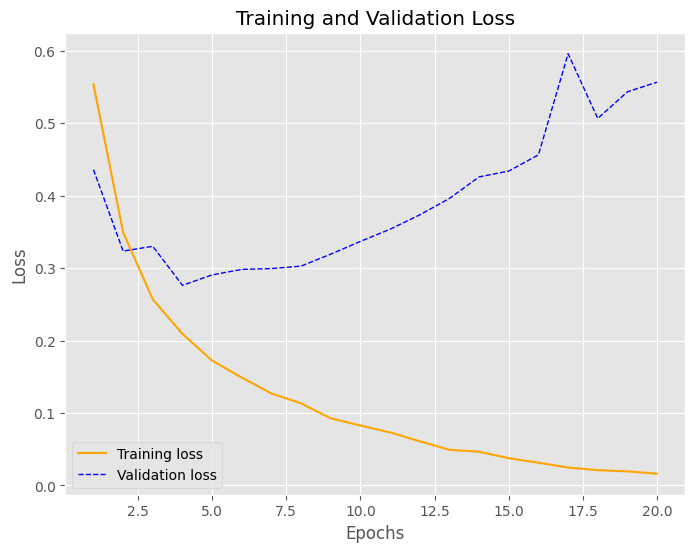

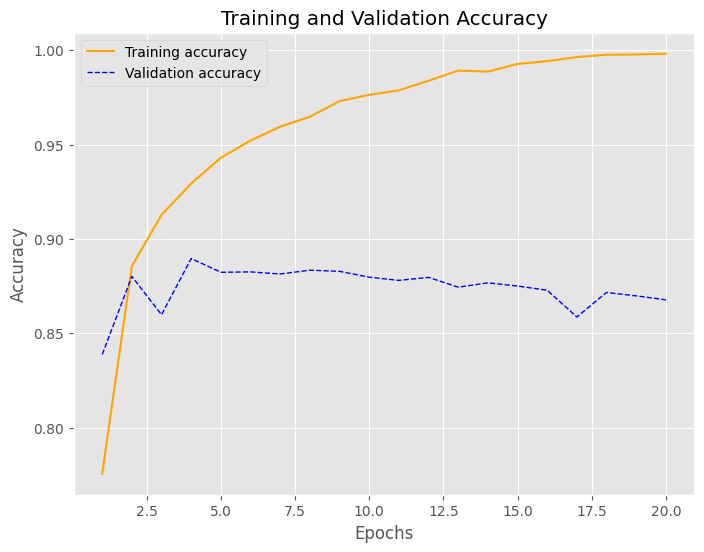

In [14]:
import matplotlib.pyplot as plt

# Exemple : history_dict déjà chargé
history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]

epochs = range(1, len(loss) + 1)

# Training and Validation Loss
plt.figure(figsize=(8,6))
plt.plot(epochs, loss, color="orange", linewidth=1.5, linestyle="-", label="Training loss")
plt.plot(epochs, val_loss, color="blue", linewidth=1.0, linestyle="--", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Training and Validation Accuracy
plt.figure(figsize=(8,6))
plt.plot(epochs, accuracy, color="orange", linewidth=1.5, linestyle="-", label="Training accuracy")
plt.plot(epochs, val_accuracy, color="blue", linewidth=1.0, linestyle="--", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


First Plot: Training and Validation Loss

The training loss (orange line) decreases steadily and reaches near zero.
The validation loss (blue dashed line) goes down until around epoch 4–5, then starts to increase again.
This rising validation loss is a clear signal of overfitting: the model keeps improving on training data but gets worse on unseen data.

Second Plot: Training and Validation Accuracy

The training accuracy keeps climbing and gets close to 100%.
The validation accuracy improves quickly in the first few epochs and stabilizes around ~87–88%, then slightly decreases after epoch 5–6.
Again, this shows the model is memorizing the training set without better generalization.

### Retrain with optimal epochs

In [23]:
from keras import models
from keras import layers

model = models.Sequential([
    layers.Input(shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),                 # Dropout after first Dense
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),                 # Dropout after second Dense
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=5,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5544 - loss: 0.6759 - val_accuracy: 0.8244 - val_loss: 0.5747
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6983 - loss: 0.5751 - val_accuracy: 0.8617 - val_loss: 0.4774
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7720 - loss: 0.4957 - val_accuracy: 0.8726 - val_loss: 0.4130
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8326 - loss: 0.4324 - val_accuracy: 0.8829 - val_loss: 0.3596
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8579 - loss: 0.3842 - val_accuracy: 0.8807 - val_loss: 0.3168


Epochs 1–2:

Training accuracy improves from ~55% to ~70%.
Validation accuracy jumps quickly from ~82% to ~86%.
Validation loss drops from 0.57 to 0.47—good progress.

Epochs 3–4:

Training accuracy increases further to ~83%.
Validation accuracy rises to ~88%.
Validation loss continues improving to 0.36.

Epoch 5:

Training accuracy reaches ~86%.
Validation accuracy stays stable (~88%).
Validation loss drops further to 0.31—this is a good sign of effective learning without severe overfitting yet.

Summary:

Shorter training (5 epochs) + Dropout gave you solid performance.
Validation loss decreased consistently across epochs.
Validation accuracy remained high and stable.
This setup is more robust against overfitting than the longer training before.

Recommendation:

This is a good training configuration. You could:
Retrain for 5–7 epochs to see if validation loss improves further.
Optionally combine EarlyStopping to stop automatically when validation loss stops decreasing.

### Evaluate on test set

In [21]:
results = model.evaluate(x_test, y_test)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8546 - loss: 0.6087
Test Loss: 0.5967190861701965
Test Accuracy: 0.8583199977874756


Test Results:

Test Accuracy: ~85.8%
Test Loss: ~0.60

What this means:

Your model generalizes well to unseen data (IMDB test set).
~86% accuracy is a solid result for this simple feedforward network on sentiment classification.
The test loss is higher than your lowest validation loss (~0.31), but that’s expected due to Dropout and no further tuning.

Summary:

Your final model performs reliably and avoids severe overfitting. For further improvements, you could:
Use more epochs with EarlyStopping.
Tune Dropout rates.
Try an Embedding layer instead of one-hot encoding.

### Script to Encode, Vectorize, and Predict Sentiment of Custom Movie Reviews Using Keras IMDB Model

In [ ]:
# This script:
#- Loads the IMDB word index with proper index shifting (+3)
#- Cleans and encodes input text reviews
#- Vectorizes them into one-hot representations
#- Predicts the probability of positive sentiment using a trained Keras model
from keras.datasets import imdb
import numpy as np
import re

# Load IMDB word index
word_index = imdb.get_word_index()

# Shift indices (+3) to match Keras conventions
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# Optional: reverse mapping if you want to display words from indices
reverse_word_index = {v: k for (k, v) in word_index.items()}

# Function to encode and vectorize input text
def prepare_input(text, word_index, dimension=10000):
    # Lowercase and clean punctuation
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    words = text.split()
    
    # Encode words with +3 shift
    indices = [word_index.get(word, 2) for word in words]
    
    # Add the <START> token
    indices = [1] + indices
    
    # Vectorize as one-hot
    vector = np.zeros((1, dimension))
    for idx in indices:
        if idx < dimension:
            vector[0, idx] = 1.0
    return vector

# Example usage
my_review = "This movie was absolutely wonderful and inspiring"

x_input = prepare_input(my_review, word_index)

# Predict
prediction = model.predict(x_input)

# Display result
prob = prediction[0][0]
print(f"\nReview: \"{my_review}\"")
print(f"Predicted probability of positive sentiment: {prob:.4f}")

if prob > 0.5:
    print("✅ Positive review")
else:
    print("❌ Negative review")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

Review: "This movie was absolutely wonderful and inspiring"
Predicted probability of positive sentiment: 0.6529
✅ Positive review


Interpretation:
Your model predicts that this review is more likely positive than negative, with a moderate level of confidence (65%).

If the threshold is 0.5 (the usual default), any score above 0.5 is considered positive sentiment.